In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay

In [84]:
index = pd.read_csv("result2.csv") 
index.head()

,keys,lm_score,hiv4_score,lm_pw,hiv4_pw
0,20100125_AAPL_10-KA_d10ka,0.600711,62.285790,0.034532,0.079106
1,20100208_BA_10k1_d10k,5.259690,279.376111,0.058846,0.087030
2,20100210_UNH_10k_d10k,2.955430,159.018505,0.042775,0.079799
3,20100212_HON_10k_c60039_10k,2.735993,169.977563,0.043494,0.083818
4,20100216_MMM_10k_a09-35783_110k,2.755357,433.202071,0.048741,0.082106


In [85]:
split = index["keys"].str.split("_", n = 3, expand = True)
index["ticker"] = split[1]
index["date"] = split[0]
index["keys"] = split[0]+"_"+split[1]
index["filling date"] = pd.to_datetime(index["date"], format='%Y%m%d')
index['end date'] = index["filling date"].apply(lambda x: x + BDay(3))
index["ticker"] = index["ticker"].replace('RTX', 'UTX')
index.head()

,keys,lm_score,hiv4_score,lm_pw,hiv4_pw,ticker,date,filling date,end date
0,20100125_AAPL,0.600711,62.285790,0.034532,0.079106,AAPL,20100125,2010-01-25,2010-01-28
1,20100208_BA,5.259690,279.376111,0.058846,0.087030,BA,20100208,2010-02-08,2010-02-11
2,20100210_UNH,2.955430,159.018505,0.042775,0.079799,UNH,20100210,2010-02-10,2010-02-15
3,20100212_HON,2.735993,169.977563,0.043494,0.083818,HON,20100212,2010-02-12,2010-02-17
4,20100216_MMM,2.755357,433.202071,0.048741,0.082106,MMM,20100216,2010-02-16,2010-02-19


In [67]:
import wrds
db = wrds.Connection()

Enter your WRDS username [zhong]:ericsunnyu
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [86]:
company = db.get_table(library='crsp', table='stocknames')

In [87]:
# remove non related data entries
company = company.loc[company['ticker'].isin(index["ticker"])]
company = company.loc[company['comnam'] != "VIVENDI"]
company = company.loc[company['comnam'] != "VIVENDI UNIVERSAL"]
company = company.loc[company['comnam'] != "HONEYWELL INC"]
company = company.loc[company['comnam'] != "TRAVELERS INC"]
company = company.loc[company['comnam'] != "TRAVELERS GROUP INC"]
company = company.loc[company['comnam'] != "THOUSAND TRAILS INC DEL"]
company = company.loc[company['comnam'] != "MORGAN J P & CO INC"]
company = company.loc[company['comnam'] != "CLEVELAND ELECTRIC ILLUM CO"]
company = company.loc[company['comnam'] != "CHEVRONTEXACO CORP"]
company = company.loc[company['comnam'] != "MINING CORP CDA"]
company = company.loc[company['comnam'] != "CRAMER ELECTRONICS INC"]
company = company.loc[company['comnam'] != "GILLETTE CO"]
company = company.loc[company['comnam'] != "C R I INSURED MORTGAGE INVS"]
company = company.loc[company['comnam'] != "CORIMON C A S A C A"]
company = company.loc[company['comnam'] != "C R I INSURED MORTGAGE INVS LP"]
company = company.loc[company['comnam'] != "CORIMON S A C A"]
company = company.loc[company['comnam'] != "CORIMON C A"]
company = company.loc[company['comnam'] != "HUDSON BAY MNG & SMLT LTD"]
company = company.loc[company['comnam'] != "COMPARATOR SYSTEMS CORP"]
company = company.loc[company['comnam'] != "NEW YORK NEW HAVEN & HARTFORD R"]
company = company.loc[company['comnam'] != "IRVING BANK CORP"]
company = company.loc[company['comnam'] != "VIKING GENERAL CORP"]
company = company.loc[company['comnam'] != "VIVRA INC"]
company = company.loc[company['comnam'] != "DUPONT DE NEMOURS INC"]
company = company.loc[company['comnam'] != "AMERICAN TELEPHONE & TELEG CO"]
company = company.loc[company['comnam'] != "A T & T CORP"]
company = company.loc[company['comnam'] != "ALCOA CORP"]
company = company.loc[company['comnam'] != "ALUMINUM COMPANY AMER"]
company = company.loc[company['comnam'] != "BACHE & CO INC"]
company = company.loc[company['comnam'] != "BACHE GROUP INC"]
company = company.loc[company['comnam'] != "BANKAMERICA CORP"]
company = company.loc[company['comnam'] != "UNION TANK CAR CO"]
company = company.groupby(['ticker']).mean().astype(int)

In [88]:
result = pd.merge(index, 
                  company['permno'],
                  left_on='ticker',
                  right_on=company.index,
                  how='left')
result.head()

,keys,lm_score,hiv4_score,lm_pw,hiv4_pw,ticker,date,filling date,end date,permno
0,20100125_AAPL,0.600711,62.285790,0.034532,0.079106,AAPL,20100125,2010-01-25,2010-01-28,14593
1,20100208_BA,5.259690,279.376111,0.058846,0.087030,BA,20100208,2010-02-08,2010-02-11,19561
2,20100210_UNH,2.955430,159.018505,0.042775,0.079799,UNH,20100210,2010-02-10,2010-02-15,92655
3,20100212_HON,2.735993,169.977563,0.043494,0.083818,HON,20100212,2010-02-12,2010-02-17,10145
4,20100216_MMM,2.755357,433.202071,0.048741,0.082106,MMM,20100216,2010-02-16,2010-02-19,22592


In [89]:
crsp = pd.read_csv('CRSP value index.csv')

In [92]:
len(stock_ret)

336

In [94]:
result.iloc[336,:]

keys                    20180215_DD
lm_score                    5.78738
hiv4_score                  493.119
lm_pw                     0.0488945
hiv4_pw                   0.0743414
ticker                           DD
date                       20180215
filling date    2018-02-15 00:00:00
end date        2018-02-20 00:00:00
permno                        11703
Name: 336, dtype: object

In [93]:
sql = "select permno, date, prc, ret from crsp.dsf where permno = " + \
    str(result['permno'][336]) + " and date>='" + str(result['filling date'][336])[:10] +\
    "' and date<='" + str(result['end date'][336])[:10] + "'"
df = db.raw_sql(sql, date_cols=['date'])
df

,permno,date,prc,ret


In [100]:
stock_ret = []
for i in range(result.shape[0]):  
    sql = "select permno, date, prc, ret from crsp.dsf where permno = " + \
        str(result['permno'][i]) + " and date>='" + str(result['filling date'][i])[:10] +\
        "' and date<='" + str(result['end date'][i])[:10] + "'"
    df = db.raw_sql(sql, date_cols=['date'])
    try: ret = (df.iloc[-1,2] - df.iloc[0,2])/df.iloc[0,2]
    except: ret = 0
    stock_ret.append(round(ret,5))

In [101]:
mkt_ret = []
for i in range(result.shape[0]):  
    n = crsp[crsp['date'].astype(str)==result['date'][i]].index
    n = n[0]
    ret = (crsp.iloc[n+3,1] - crsp.iloc[n,1])/crsp.iloc[n,1]
    mkt_ret.append(round(ret,5))

In [103]:
result['ret'] = stock_ret
result['mkt_ret'] = mkt_ret
result['excess_ret'] = result['ret'] - result['mkt_ret']
result.head()

,keys,lm_score,hiv4_score,lm_pw,hiv4_pw,ticker,date,filling date,end date,permno,ret,mkt_ret,excess_ret
0,20100125_AAPL,0.600711,62.285790,0.034532,0.079106,AAPL,20100125,2010-01-25,2010-01-28,14593,-0.01864,-0.01105,-0.00759
1,20100208_BA,5.259690,279.376111,0.058846,0.087030,BA,20100208,2010-02-08,2010-02-11,19561,0.04664,0.02467,0.02197
2,20100210_UNH,2.955430,159.018505,0.042775,0.079799,UNH,20100210,2010-02-10,2010-02-15,92655,-0.01620,0.02915,-0.04535
3,20100212_HON,2.735993,169.977563,0.043494,0.083818,HON,20100212,2010-02-12,2010-02-17,10145,0.03249,0.02980,0.00269
4,20100216_MMM,2.755357,433.202071,0.048741,0.082106,MMM,20100216,2010-02-16,2010-02-19,22592,0.01305,0.01384,-0.00079


In [104]:
result['lm_rank'] = result['lm_score'].rank(method='first')
result['hiv4_rank'] = result['hiv4_score'].rank(method='first')
result['lm_pw_rank'] = result['lm_pw'].rank(method='first')
result['hiv4_pw_rank'] = result['hiv4_pw'].rank(method='first')

bin_labels = ['5', '4', '3', '2', '1']
result['lm_quantile'] = pd.qcut(result['lm_rank'].astype(int), 5, labels=bin_labels)
result['hiv4_quantile'] = pd.qcut(result['hiv4_rank'].astype(int), 5, labels=bin_labels)
result['lm_pw_quantile'] = pd.qcut(result['lm_pw_rank'].astype(int), 5, labels=bin_labels)
result['hiv4_pw_quantile'] = pd.qcut(result['hiv4_pw_rank'].astype(int), 5, labels=bin_labels)

In [105]:
quantile = result[['keys', 'excess_ret', 'lm_quantile', 'hiv4_quantile', 'lm_pw_quantile', 'hiv4_pw_quantile']]
quantile.head()

,keys,excess_ret,lm_quantile,hiv4_quantile,lm_pw_quantile,hiv4_pw_quantile
0,20100125_AAPL,-0.00759,5,5,5,4
1,20100208_BA,0.02197,2,3,1,2
2,20100210_UNH,-0.04535,3,4,4,3
3,20100212_HON,0.00269,4,4,4,3
4,20100216_MMM,-0.00079,4,2,2,3


In [116]:
lm_quantile = quantile.groupby(['lm_quantile']).median()
lm_quantile

,excess_ret
lm_quantile,
5,-0.002300
4,0.000625
3,-0.001510
2,0.002375
1,0.002965


In [117]:
hiv4_quantile = quantile.groupby(['hiv4_quantile']).median()
hiv4_quantile

,excess_ret
hiv4_quantile,
5,-0.004705
4,0.002505
3,-0.001510
2,-0.001275
1,0.004420


In [118]:
lm_pw_quantile = quantile.groupby(['lm_pw_quantile']).median()
lm_pw_quantile

,excess_ret
lm_pw_quantile,
5,-0.00208
4,0.00039
3,0.00104
2,0.00008
1,-0.00128


In [119]:
hiv4_pw_quantile = quantile.groupby(['hiv4_pw_quantile']).median()
hiv4_pw_quantile

,excess_ret
hiv4_pw_quantile,
5,-0.001140
4,-0.001810
3,-0.000355
2,0.002065
1,-0.000980


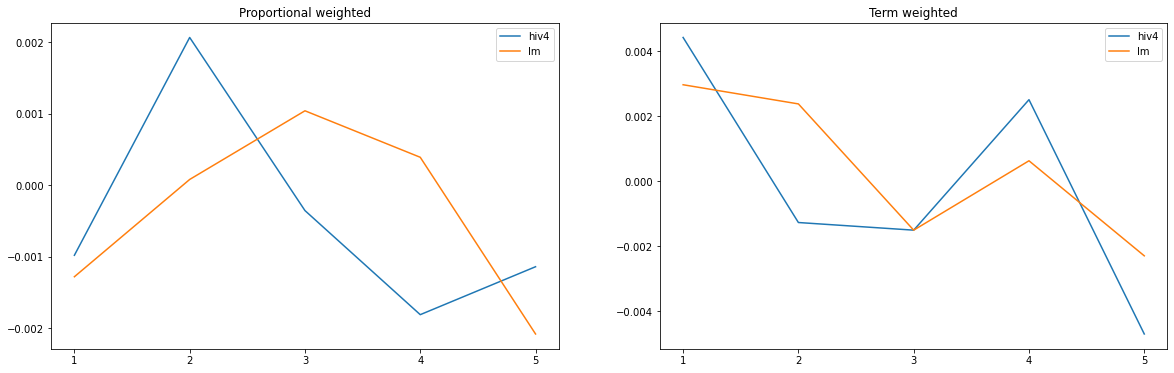

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
ax1.plot(hiv4_pw_quantile, label='hiv4')
ax1.plot(lm_pw_quantile, label='lm')
ax1.invert_xaxis()
ax1.legend()
ax1.set_title("Proportional weighted") 

ax2.plot(hiv4_quantile, label='hiv4')
ax2.plot(lm_quantile, label='lm')
ax2.invert_xaxis()
ax2.legend()
ax2.set_title("Term weighted") 

plt.show()

In [ ]:
# db.close()